In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Any results you write to the current directory are saved as output.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [3]:
col = ['duration','protocol_type', 
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login', 
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'target']

In [4]:
info = pd.read_csv('../input/kdd.txt',names = col)

In [5]:
info.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [6]:
info.shape

(125973, 42)

In [7]:
info.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
info['target'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.'], dtype=object)

In [9]:
info['target'].value_counts()

normal.             60720
neptune.            38322
smurf.              22753
back.                2002
ipsweep.              760
satan.                540
portsweep.            278
nmap.                 231
teardrop.             199
guess_passwd.          53
pod.                   40
warezmaster.           20
land.                  17
imap.                  12
ftp_write.              8
multihop.               6
buffer_overflow.        5
phf.                    3
loadmodule.             2
perl.                   2
Name: target, dtype: int64

In [10]:
X = info.iloc[:,:41].values

In [11]:
print(X)

[[0 'tcp' 'http' ... 0.0 0.0 0.0]
 [0 'tcp' 'http' ... 0.0 0.0 0.0]
 [0 'tcp' 'http' ... 0.0 0.0 0.0]
 ...
 [0 'tcp' 'private' ... 1.0 0.0 0.0]
 [0 'tcp' 'private' ... 1.0 0.0 0.0]
 [0 'tcp' 'private' ... 1.0 0.0 0.0]]


In [12]:
Y = info.iloc[:,41].values

In [13]:
diagram=pd.DataFrame({'attcks':Y})

In [14]:
gg=dict()
total=0
for i in diagram['attcks']:
    total+=1
    gg[i]=gg.get(i,0)+1

In [15]:
per=dict()
for i in gg:
    per[i]=round(gg[i]/total,4)

In [16]:
print(per)

{'normal.': 0.482, 'buffer_overflow.': 0.0, 'loadmodule.': 0.0, 'perl.': 0.0, 'neptune.': 0.3042, 'smurf.': 0.1806, 'guess_passwd.': 0.0004, 'pod.': 0.0003, 'teardrop.': 0.0016, 'portsweep.': 0.0022, 'ipsweep.': 0.006, 'land.': 0.0001, 'ftp_write.': 0.0001, 'back.': 0.0159, 'imap.': 0.0001, 'satan.': 0.0043, 'phf.': 0.0, 'nmap.': 0.0018, 'multihop.': 0.0, 'warezmaster.': 0.0002}


In [17]:
aa=[]
for i in per:
    aa.append(per[i])
    

In [18]:
print(aa)

[0.482, 0.0, 0.0, 0.0, 0.3042, 0.1806, 0.0004, 0.0003, 0.0016, 0.0022, 0.006, 0.0001, 0.0001, 0.0159, 0.0001, 0.0043, 0.0, 0.0018, 0.0, 0.0002]


In [19]:
bb=per.keys()

In [20]:
print(bb)

dict_keys(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.', 'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.', 'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.', 'phf.', 'nmap.', 'multihop.', 'warezmaster.'])


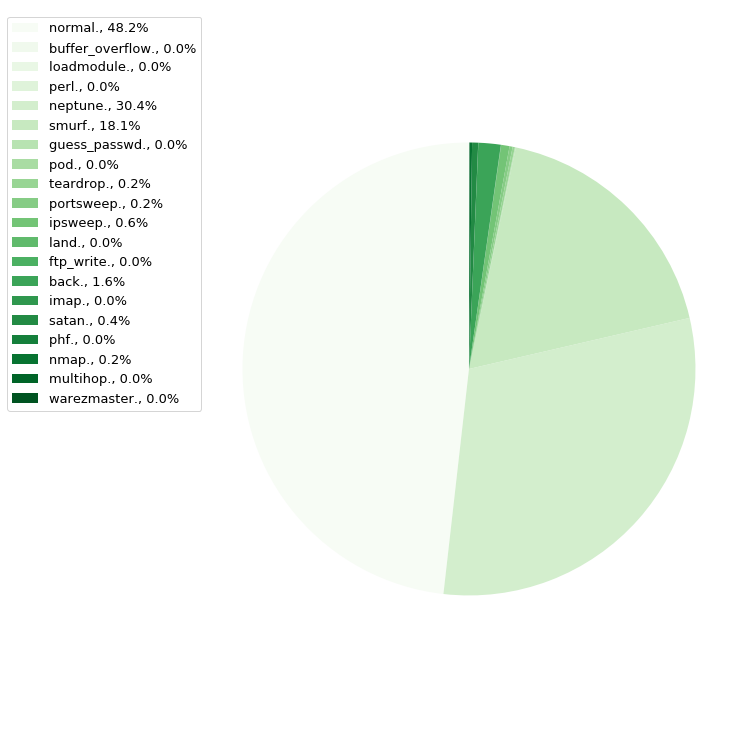

In [21]:
import matplotlib.pyplot as plt


labels = [ i for i in bb]

fig1, ax1 = plt.subplots(figsize=(10, 10))
fig1.subplots_adjust(0.3,0,1,1)


theme = plt.get_cmap('Greens')
ax1.set_prop_cycle("color", [theme(1. * i / len(aa)) for i in range(len(aa))])

_, _ = ax1.pie(aa, startangle=90)

ax1.axis('equal')

total = sum(aa)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, aa)],
    prop={'size': 13},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

plt.show()

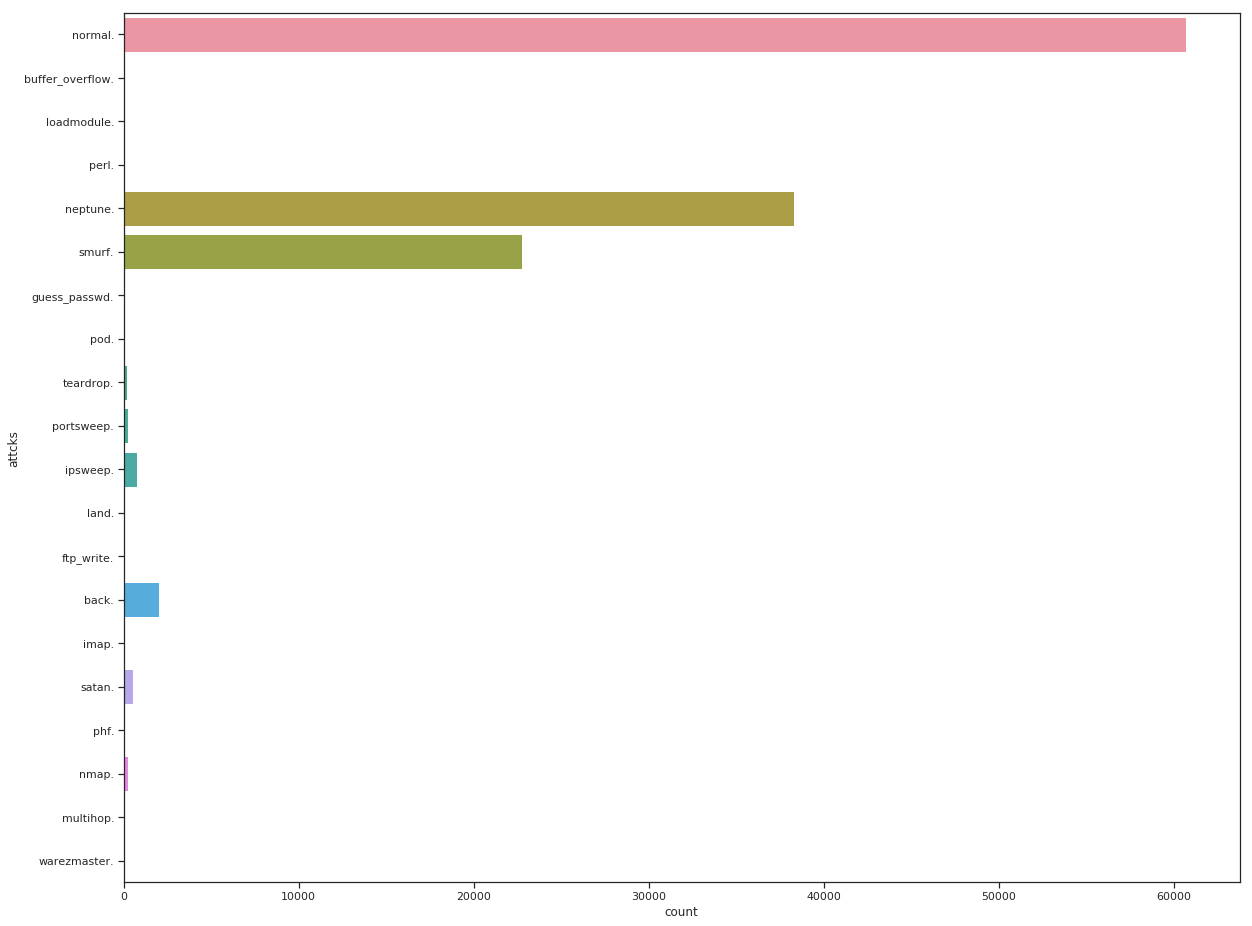

In [22]:
import seaborn as sns
sns.set(style="ticks")


plt.figure(figsize=(20,16))

x_t=[5,10,20,60,200,400,800,1200,2500,4000,20000,40000,60000,9000]

ax=sns.countplot(y='attcks',data=diagram)

In [23]:
#labelencoder used to convert objects to numerical values
# 1st, 2nd, 3rd and target colums 42nd
labelencoder_X = LabelEncoder()
X[:,1] = labelencoder_X.fit_transform(X[:,1])
X[:,2] = labelencoder_X.fit_transform(X[:,2])
X[:,3] = labelencoder_X.fit_transform(X[:,3])

In [24]:
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [25]:
# Calculation Type of Categories Or labels
s = set()
for x in Y:
    s.add(x)
print(len(s))

20


In [26]:
print('[',end = "")
for i in s:
    print(i,",",end = "")
print(']')

[0 ,1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,]


In [27]:
# Different types of objects in columns 1,2,3
typ = []
for i in range(1,4):
    s = set()
    for i in X[:,i]:
        s.add(i)
    typ.append(len(s))

for i in range(len(typ)):
    print('different types in column',i+1,'=',typ[i])

different types in column 1 = 3
different types in column 2 = 63
different types in column 3 = 11


In [28]:
one=OneHotEncoder(categorical_features=[1,2,3])

In [29]:
X=one.fit_transform(X).toarray()

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [30]:
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def linsvc(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 10)
    classf = LinearSVC()
    classf.fit(x_train, y_train)
    pred = classf.predict(x_test)
    print("Linear SVC accuracy_score:",accuracy_score(y_test, pred))
    print("Linear SVC precision_score:",precision_score(y_test, pred, average='weighted'))
    print("Linear SVC recall_score:",recall_score(y_test, pred, average='weighted'))
    print("Linear SVC f1_score:",f1_score(y_test, pred, average='weighted'))
    print ('Confusion matrix for Linear Support Vector classifier')
    print(multilabel_confusion_matrix(y_test, pred, labels=[i for i in range(20)]))
    
    return(y_test, pred)

def revknn(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 10)
    classf = KNeighborsClassifier(n_neighbors=2)
    classf.fit(x_train, y_train)
    pred = classf.predict(x_test)
    print("Knn accuracy_score:",accuracy_score(y_test, pred))
    print("Knn precision_score:",precision_score(y_test, pred,average='weighted'))
    print("Knn recall_score:",recall_score(y_test, pred, average='weighted'))
    print("Knn f1_score:",f1_score(y_test, pred, average='weighted'))
    print ('Confusion matrix for Knearest Kneighbours classifier')
    print(multilabel_confusion_matrix(y_test, pred, labels=[i for i in range(20)]))
    return(y_test, pred)

def revnb(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 10)
    classf = MultinomialNB()
    classf.fit(x_train, y_train)
    pred = classf.predict(x_test)
    print("Naive Bayes accuracy_score:",accuracy_score(y_test, pred))
    print("Naive Bayes precision_score:",precision_score(y_test, pred,average='weighted'))
    print("Naive Bayes recall_score:",recall_score(y_test, pred, average='weighted'))
    print("Naive Bayes f1_score:",f1_score(y_test, pred, average='weighted'))
    print ('Confusion matrix for Naive Bayes classifier')
    print(multilabel_confusion_matrix(y_test, pred, labels=[i for i in range(20)]))
    
    return(y_test, pred)

def rfc(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 10)
    classf = RandomForestClassifier(n_estimators=70, random_state=101, max_features = None)
    classf.fit(x_train, y_train)
    pred = classf.predict(x_test)
    print("Random forest accuracy_score:",accuracy_score(y_test, pred))
    print("Random forest precision_score:",precision_score(y_test, pred,average='weighted'))
    print("Random forest recall_score:",recall_score(y_test, pred, average='weighted'))
    print("Random forest f1_score:",f1_score(y_test, pred, average='weighted'))
    print ('Confusion matrix for Random Forest classifier')
    print(multilabel_confusion_matrix(y_test, pred, labels=[i for i in range(20)]))
    return(y_test, pred)

def lrc(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 10)
    classf = LogisticRegression()
    classf.fit(x_train, y_train)
    pred = classf.predict(x_test)
    print("logistic Regression accuracy_score:",accuracy_score(y_test, pred))
    print("logistic Regression precision_score:",precision_score(y_test, pred,average='weighted'))
    print("logistic Regression recall_score:",recall_score(y_test, pred,average='weighted'))
    print("logistic Regression f1_score:",f1_score(y_test, pred, average='weighted'))
    print ('Confusion matrix for Logistic Regression')
    print(multilabel_confusion_matrix(y_test, pred, labels=[i for i in range(20)]))

    return(y_test, pred)

def dtc(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 10)
    classf = DecisionTreeClassifier(max_depth = 10, random_state=101,max_features = None)
    classf.fit(x_train, y_train)
    pred = classf.predict(x_test)
    print("Decison tree classifier accuracy_score:",accuracy_score(y_test, pred))
    print("Decison tree classifier precision_score:",precision_score(y_test, pred,average='weighted'))
    print("Decison tree classifier recall_score:",recall_score(y_test, pred, average='weighted'))
    print("Decison tree classifier f1_score:",f1_score(y_test, pred, average='weighted'))
    print ('Confusion matrix for Decision Tree classifier')
    print(multilabel_confusion_matrix(y_test, pred, labels=[i for i in range(20)]))
    return(y_test, pred)

def sgd(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 10)
    classf = SGDClassifier(loss='modified_huber',shuffle = True,random_state=101)
    classf.fit(x_train, y_train)
    pred = classf.predict(x_test)
    print("sgd classifier accuracy_score:",accuracy_score(y_test, pred))
    print("sgd classifier precision_score:",precision_score(y_test, pred,average='weighted'))
    print("sgd classifier recall_score:",recall_score(y_test, pred, average='weighted'))
    print("sgd classifier f1_score:",f1_score(y_test, pred, average='weighted'))
    print ('Confusion matrix for Stochastic Gradient Descent classifier')
    print(multilabel_confusion_matrix(y_test, pred, labels=[i for i in range(20)]))
    
    return(y_test, pred)


In [31]:
knny1,knnp1 = revknn(X,Y)

Knn accuracy_score: 0.9969518003429224
Knn precision_score: 0.9969577332215842
Knn recall_score: 0.9969518003429224
Knn f1_score: 0.9968905678384402
Confusion matrix for Knearest Kneighbours classifier
[[[30964     1]
  [    1   528]]

 [[31492     0]
  [    1     1]]

 [[31488     2]
  [    3     1]]

 [[31475     3]
  [    1    15]]

 [[31490     1]
  [    1     2]]

 [[31284    30]
  [    9   171]]

 [[31489     0]
  [    0     5]]

 [[31493     1]
  [    0     0]]

 [[31489     3]
  [    1     1]]

 [[21933    19]
  [    1  9541]]

 [[31413    17]
  [   31    33]]

 [[16253    16]
  [   20 15205]]

 [[31494     0]
  [    0     0]]

 [[31493     0]
  [    0     1]]

 [[31486     0]
  [    0     8]]

 [[31412     3]
  [   12    67]]

 [[31353     0]
  [   14   127]]

 [[25860     0]
  [    0  5634]]

 [[31441     0]
  [    1    52]]

 [[31488     0]
  [    0     6]]]


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [32]:
knn_1=labelencoder_Y.inverse_transform(knnp1)
knn_2=labelencoder_Y.inverse_transform(knny1)

In [33]:
svc11,svc21 = linsvc(X,Y)

Linear SVC accuracy_score: 0.9568171715247349
Linear SVC precision_score: 0.9789422726922388
Linear SVC recall_score: 0.9568171715247349
Linear SVC f1_score: 0.9651436648604966
Confusion matrix for Linear Support Vector classifier
[[[30965     0]
  [  529     0]]

 [[31492     0]
  [    2     0]]

 [[31455    35]
  [    3     1]]

 [[31447    31]
  [    0    16]]

 [[31476    15]
  [    1     2]]

 [[31314     0]
  [  149    31]]

 [[31489     0]
  [    0     5]]

 [[31494     0]
  [    0     0]]

 [[31492     0]
  [    2     0]]

 [[21948     4]
  [    0  9542]]

 [[30189  1241]
  [    8    56]]

 [[16244    25]
  [  617 14608]]

 [[31494     0]
  [    0     0]]

 [[31493     0]
  [    1     0]]

 [[31486     0]
  [    8     0]]

 [[31409     6]
  [    4    75]]

 [[31353     0]
  [    3   138]]

 [[25859     1]
  [   27  5607]]

 [[31441     0]
  [    0    53]]

 [[31486     2]
  [    6     0]]]


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
svc_1=labelencoder_Y.inverse_transform(svc21)
svc_2=labelencoder_Y.inverse_transform(svc11)

In [35]:
nb1,nb21 = revnb(X,Y)

Naive Bayes accuracy_score: 0.644789483711183
Naive Bayes precision_score: 0.9773660739695889
Naive Bayes recall_score: 0.644789483711183
Naive Bayes f1_score: 0.7080315973540423
Confusion matrix for Naive Bayes classifier
[[[30290   675]
  [    0   529]]

 [[31472    20]
  [    0     2]]

 [[31145   345]
  [    4     0]]

 [[26063  5415]
  [    1    15]]

 [[31247   244]
  [    3     0]]

 [[30839   475]
  [   21   159]]

 [[31472    17]
  [    0     5]]

 [[31437    57]
  [    0     0]]

 [[31483     9]
  [    2     0]]

 [[21937    15]
  [   19  9523]]

 [[30604   826]
  [   33    31]]

 [[16269     0]
  [11007  4218]]

 [[31460    34]
  [    0     0]]

 [[29096  2397]
  [    0     1]]

 [[31140   346]
  [    0     8]]

 [[31353    62]
  [   79     0]]

 [[31347     6]
  [   17   124]]

 [[25825    35]
  [    0  5634]]

 [[31237   204]
  [    1    52]]

 [[31483     5]
  [    0     6]]]


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [36]:
nb_1=labelencoder_Y.inverse_transform(nb21)
nb_2=labelencoder_Y.inverse_transform(nb1)

In [37]:
rfc1,rfc21 = rfc(X,Y)

Random forest accuracy_score: 0.9994602146440592
Random forest precision_score: 0.9994672857941749
Random forest recall_score: 0.9994602146440592
Random forest f1_score: 0.9994394615014264
Confusion matrix for Random Forest classifier
[[[30965     0]
  [    0   529]]

 [[31492     0]
  [    1     1]]

 [[31490     0]
  [    2     2]]

 [[31478     0]
  [    1    15]]

 [[31491     0]
  [    0     3]]

 [[31313     1]
  [    4   176]]

 [[31489     0]
  [    0     5]]

 [[31494     0]
  [    0     0]]

 [[31492     0]
  [    1     1]]

 [[21951     1]
  [    0  9542]]

 [[31427     3]
  [    1    63]]

 [[16258    11]
  [    3 15222]]

 [[31494     0]
  [    0     0]]

 [[31493     0]
  [    0     1]]

 [[31486     0]
  [    0     8]]

 [[31415     0]
  [    0    79]]

 [[31353     0]
  [    3   138]]

 [[25860     0]
  [    0  5634]]

 [[31441     0]
  [    1    52]]

 [[31487     1]
  [    0     6]]]


In [38]:
rfc_1=labelencoder_Y.inverse_transform(rfc21)
rfc_2=labelencoder_Y.inverse_transform(rfc1)


In [39]:
lrc11,lrc21 = lrc(X,Y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


logistic Regression accuracy_score: 0.9736457737981837
logistic Regression precision_score: 0.9693297196421832
logistic Regression recall_score: 0.9736457737981837
logistic Regression f1_score: 0.9671320231258159
Confusion matrix for Logistic Regression
[[[30857   108]
  [  327   202]]

 [[31492     0]
  [    2     0]]

 [[31490     0]
  [    3     1]]

 [[31478     0]
  [    0    16]]

 [[31491     0]
  [    3     0]]

 [[31314     0]
  [  176     4]]

 [[31489     0]
  [    0     5]]

 [[31494     0]
  [    0     0]]

 [[31492     0]
  [    2     0]]

 [[21796   156]
  [    1  9541]]

 [[31430     0]
  [   60     4]]

 [[15721   548]
  [  127 15098]]

 [[31494     0]
  [    0     0]]

 [[31493     0]
  [    1     0]]

 [[31486     0]
  [    7     1]]

 [[31405    10]
  [   79     0]]

 [[31353     0]
  [   21   120]]

 [[25853     7]
  [   19  5615]]

 [[31441     0]
  [    2    51]]

 [[31487     1]
  [    0     6]]]


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
lrc_1=labelencoder_Y.inverse_transform(lrc21)
lrc_2=labelencoder_Y.inverse_transform(lrc11)

In [41]:
dtc11,dtc21 = dtc(X,Y)

Decison tree classifier accuracy_score: 0.9986664126500285
Decison tree classifier precision_score: 0.9982924519754026
Decison tree classifier recall_score: 0.9986664126500285
Decison tree classifier f1_score: 0.9984691799561359
Confusion matrix for Decision Tree classifier
[[[30965     0]
  [    0   529]]

 [[31492     0]
  [    2     0]]

 [[31490     0]
  [    4     0]]

 [[31478     0]
  [    1    15]]

 [[31491     0]
  [    3     0]]

 [[31313     1]
  [    7   173]]

 [[31489     0]
  [    1     4]]

 [[31494     0]
  [    0     0]]

 [[31492     0]
  [    2     0]]

 [[21951     1]
  [    1  9541]]

 [[31426     4]
  [    1    63]]

 [[16233    36]
  [    3 15222]]

 [[31494     0]
  [    0     0]]

 [[31493     0]
  [    1     0]]

 [[31486     0]
  [    0     8]]

 [[31415     0]
  [    0    79]]

 [[31353     0]
  [    9   132]]

 [[25860     0]
  [    7  5627]]

 [[31441     0]
  [    0    53]]

 [[31488     0]
  [    0     6]]]


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
dtc_1=labelencoder_Y.inverse_transform(dtc21)
dtc_2=labelencoder_Y.inverse_transform(dtc11)

In [43]:
sgd11,sgd21 = sgd(X,Y)

sgd classifier accuracy_score: 0.42814504350034926
sgd classifier precision_score: 0.6665505692005618
sgd classifier recall_score: 0.42814504350034926
sgd classifier f1_score: 0.5066624238799421
Confusion matrix for Stochastic Gradient Descent classifier
[[[30965     0]
  [  529     0]]

 [[31492     0]
  [    2     0]]

 [[31490     0]
  [    4     0]]

 [[31478     0]
  [   16     0]]

 [[31491     0]
  [    3     0]]

 [[22148  9166]
  [  175     5]]

 [[29958  1531]
  [    5     0]]

 [[31494     0]
  [    0     0]]

 [[31492     0]
  [    2     0]]

 [[21952     0]
  [ 5121  4421]]

 [[31430     0]
  [   64     0]]

 [[10838  5431]
  [11940  3285]]

 [[31494     0]
  [    0     0]]

 [[31493     0]
  [    1     0]]

 [[31486     0]
  [    8     0]]

 [[29692  1723]
  [   79     0]]

 [[31353     0]
  [   25   116]]

 [[25776    84]
  [   23  5611]]

 [[31366    75]
  [    7    46]]

 [[31488     0]
  [    6     0]]]


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
sgd_1=labelencoder_Y.inverse_transform(sgd21)
sgd_2=labelencoder_Y.inverse_transform(sgd11) 

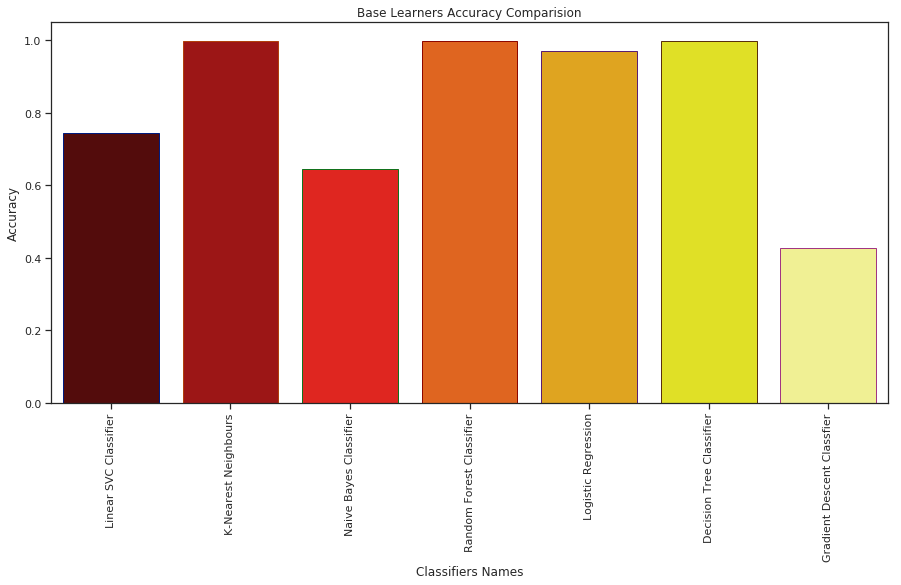

In [45]:
# Comparision among different classifiers's accuracies
import matplotlib.pyplot as plt
import seaborn as sns
names = ['Linear SVC Classifier', 'K-Nearest Neighbours', 'Naive Bayes Classifier','Random Forest Classifier',
        'Logistic Regression','Decision Tree Classifier','Gradient Descent Classfier']
results = [0.745475,0.99695,0.646472,0.999491,0.971264,0.9986664,0.428281]
plt.subplots(figsize=(15,7))
sns.barplot(names,results,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Classifiers Names') 
plt.ylabel('Accuracy')
plt.title('Base Learners Accuracy Comparision')
plt.show()